#### Data preparation


In [1]:
import numpy as np
np.random.seed(42)

In [2]:
from typing import List
from typing import Tuple

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

c:\Users\Jan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(f"x_train shape: {x_train.shape} x_test.shape: {x_test.shape}")


x_train shape: (455, 30) x_test.shape: (114, 30)


#### Cross Validation


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


In [5]:
def print_cv_results(scores: List[float]) -> Tuple[float, float]:
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    print(f"Accuracies:\n{scores}")
    print(f"Mean Score: {mean_score}")
    print(f"Std Score: {std_score}")
    return mean_score, std_score

In [6]:
def plot_cv_results(scores: List[float], mean_score: float) -> None:
    plt.axhline(mean_score, linestyle="-", color="red")
    plt.plot(range(len(scores)), scores, color="blue")
    plt.xlim(0, len(scores) - 1)
    plt.ylim(0.85, 1)
    plt.legend(["Validation Scores", "Mean Score"])
    plt.show()

Accuracies:
[0.94505495 0.87912088 0.97802198 0.9010989  0.9010989 ]
Mean Score: 0.9208791208791208
Std Score: 0.03571005892147674


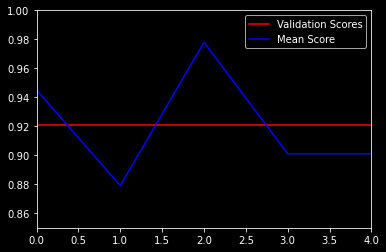

In [7]:
clf = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(clf, x_train, y_train, cv=5, n_jobs=-1)

mean, _ = print_cv_results(scores)
plot_cv_results(scores, mean)

Accuracies:
[0.92307692 0.87912088 0.9010989  0.87912088 0.92307692]
Mean Score: 0.9010989010989011
Std Score: 0.019657740461536642


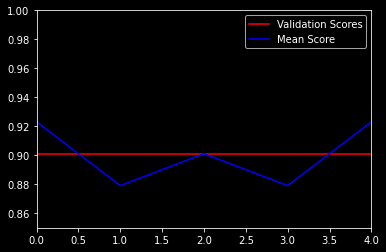

In [8]:
clf = KNeighborsClassifier(n_neighbors=2)

scores = cross_val_score(clf, x_train, y_train, cv=5, n_jobs=-1)

mean, _ = print_cv_results(scores)
plot_cv_results(scores, mean)

Accuracies:
[0.92307692 0.9010989  0.93406593 0.89010989 0.91208791]
Mean Score: 0.9120879120879121
Std Score: 0.015540808377726343


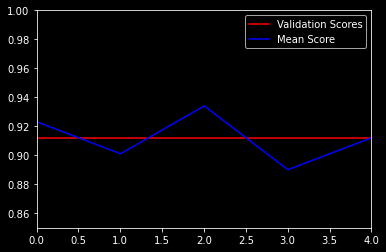

In [9]:
clf = KNeighborsClassifier(n_neighbors=4)

scores = cross_val_score(clf, x_train, y_train, cv=5, n_jobs=-1)

mean, _ = print_cv_results(scores)
plot_cv_results(scores, mean)